In [10]:
import os
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import keras
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.python.keras.layers import Input, Dense, Flatten, Lambda, Dropout
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import backend as K
from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score
from tensorflow.keras import backend as K
import random

In [11]:
# function load data and label 
def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(uniq_labels):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (32, 32))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [12]:
train_dir = "./Images"

uniq_labels = sorted(os.listdir(train_dir))
images, labels = load_images(train_dir)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, stratify = labels)

n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

print("Total number of symbols: ", n)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)

Total number of symbols:  26
Number of training images:  3358
Number of testing images:  840


In [13]:
def get_label(arg):
    match arg:
        case 0:
            return "A"
        case 1:
            return "B"
        case 2:
            return "C"
        case 3:
            return "D"
        case 4:
            return "E"
        case 5:
            return "F"
        case 6:
            return "G"
        case 7:
            return "H"
        case 8:
            return "I"
        case 9:
            return "J"
        case 10:
            return "K"
        case 11:
            return "L"
        case 12:
            return "M"
        case 13:
            return "N"
        case 14:
            return "O"
        case 15:
            return "P"
        case 16:
            return "Q"
        case 17:
            return "R"
        case 18:
            return "S"
        case 19:
            return "T"
        case 20:
            return "U"
        case 21:
            return "V"
        case 22:
            return "W"
        case 23:
            return "X"
        case 24:
            return "Y"
        case 25:
            return "Z"

test ảnh index = 3346
onhot vector
S


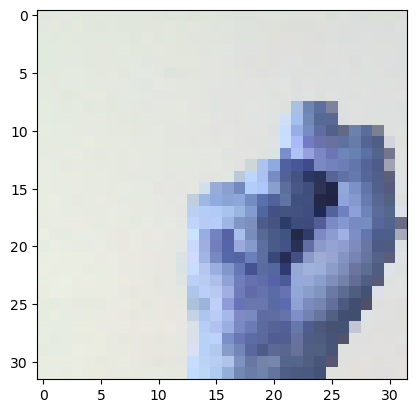

In [14]:
x = random.randint(0,X_train.shape[0])
# x=1
print("test ảnh index = {}".format(x))
print("onhot vector")
print(get_label(y_train[x]))
plt.imshow(X_train[x], cmap='gray')
plt.show()

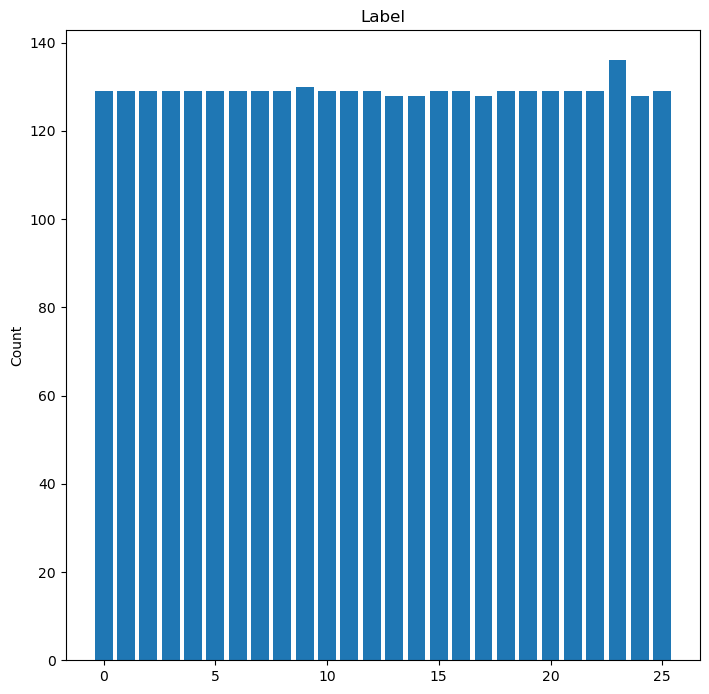

In [15]:
# visualization 

# def addlabels(x,y):
#     for i in range(len(x)):
#         plt.text(i,y[i],y[i])

uniq, counts = np.unique(y_train, return_counts=True)

fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
ax1.set_ylabel('Count')
ax1.set_title('Label')

plt.bar(uniq, counts)
# addlabels(uniq, counts)

plt.show()

In [16]:

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1(y_true, y_pred):
    precision_f = precision(y_true, y_pred)
    recall_f = recall(y_true, y_pred)
    return 2*((precision_f*recall_f)/(precision_f+recall_f+K.epsilon()))

In [17]:

def resnet50_model():
    model= Sequential()

    pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                       input_shape=(32,32,3),
                       pooling='avg',classes=26,
                       weights='imagenet')
    for layer in pretrained_model.layers:
            layer.trainable=False

    model.add(pretrained_model)
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(26, activation='softmax'))
    model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics = ['accuracy',f1, precision,recall])
    
    return model


In [18]:
resnet50_model = resnet50_model()
print(resnet50_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 26)                13338     
                                                                 
Total params: 24,650,138
Trainable params: 1,062,426
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [19]:
y_train = to_categorical(y_train, 26).astype(np.uint8)
y_test_b = to_categorical(y_test, 26).astype(np.uint8)
history = resnet50_model.fit(X_train,
                    y_train,
                    batch_size = 128,
                    epochs = 10,
                    verbose = 1,
                    validation_data = (X_test, y_test_b))

Epoch 1/10
27/27 [==============================] - 16s 390ms/step - loss: 0.7430 - accuracy: 0.8326 - f1: 0.8244 - precision: 0.9150 - recall: 0.7699 - val_loss: 0.0645 - val_accuracy: 0.9893 - val_f1: 0.9837 - val_precision: 0.9945 - val_recall: 0.9731
Epoch 2/10
27/27 [==============================] - 9s 324ms/step - loss: 0.0340 - accuracy: 0.9943 - f1: 0.9940 - precision: 0.9962 - recall: 0.9919 - val_loss: 0.0189 - val_accuracy: 0.9940 - val_f1: 0.9945 - val_precision: 0.9955 - val_recall: 0.9936
Epoch 3/10
27/27 [==============================] - 10s 355ms/step - loss: 0.0075 - accuracy: 0.9991 - f1: 0.9990 - precision: 0.9997 - recall: 0.9983 - val_loss: 0.0136 - val_accuracy: 0.9964 - val_f1: 0.9958 - val_precision: 0.9958 - val_recall: 0.9958
Epoch 4/10
27/27 [==============================] - 9s 334ms/step - loss: 0.0042 - accuracy: 0.9997 - f1: 0.9996 - precision: 0.9997 - recall: 0.9994 - val_loss: 0.0105 - val_accuracy: 0.9976 - val_f1: 0.9983 - val_precision: 0.9989 - v

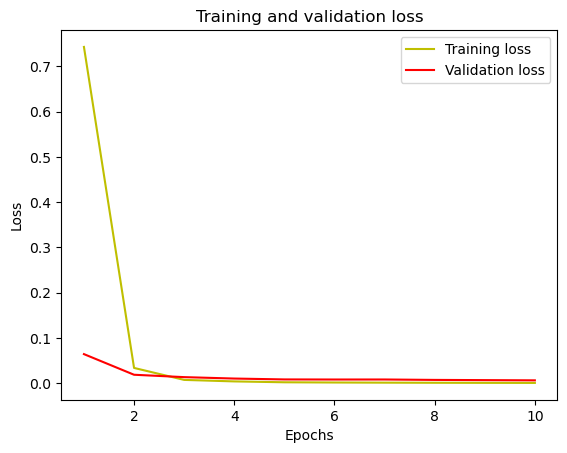

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

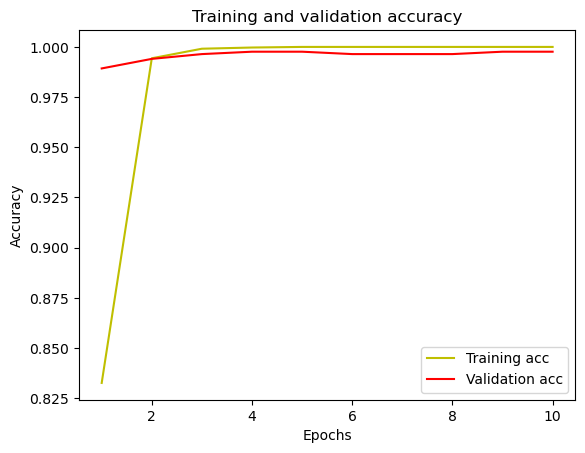

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
resnet50_model.save('resnet50_model.h5')

In [23]:

prediction = resnet50_model.predict(X_test) 

27/27 [==============================] - 5s 114ms/step


Predicted Label:  O
True Label:  O


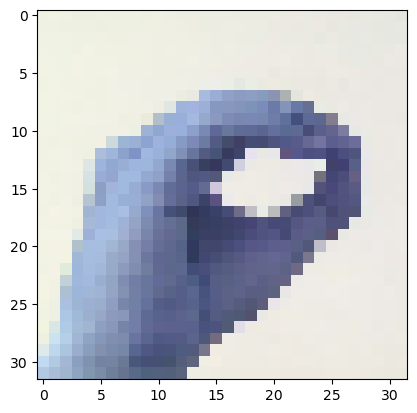

In [24]:
classes = np.argmax(prediction,axis=1)

i = random.randint(1,len(prediction))
plt.imshow(X_test[i]) 
print("Predicted Label: ", get_label(classes[i]))
print("True Label: ", get_label(y_test[i]))

In [25]:
accuracy = accuracy_score(y_test, classes)
print('Accuracy Score = ', accuracy*100, "%")

Accuracy Score =  99.76190476190476 %


In [26]:
pred =  resnet50_model.evaluate(X_test, y_test_b)
print ("Loss = " + str(pred[0]))
print ("Test Accuracy = " + str(pred[1]))

27/27 [==============================] - 3s 109ms/step - loss: 0.0066 - accuracy: 0.9976 - f1: 0.9977 - precision: 0.9977 - recall: 0.9977
Loss = 0.0065535870380699635
Test Accuracy = 0.9976190328598022


In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test,classes,zero_division=0))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       1.00      0.97      0.98        32
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        32
           4       0.97      1.00      0.98        32
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        32
           8       1.00      1.00      1.00        32
           9       1.00      1.00      1.00        33
          10       1.00      1.00      1.00        32
          11       1.00      1.00      1.00        32
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        33
          14       1.00      1.00      1.00        33
          15       1.00      1.00      1.00        32
          16       1.00      1.00      1.00        32
          17       1.00    